# ****Data Extraction****

### **Importing required libraries:**

In [37]:
import requests
import lxml
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient


### **Web Scraping:**

In [38]:
# Sending a GET request to the homepage to retrieve its HTML content
page =requests.get(r"https://books.toscrape.com/")
#  HTML content of the page
content=page.content
# Now let's analyse the page using BeautifulSoup
soup= BeautifulSoup(content,"lxml")
#explore HTML page
print (soup)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static

In [39]:
# After exploring the page we find that each book information listed in <article class="product_pod"> tag
# we will explore the page of the first book to explore more information

first_book = soup.select_one("article.product_pod")

# get the link of the book
relative_link = first_book.h3.a["href"]

full_link = "https://books.toscrape.com/" + relative_link

book_page = requests.get(full_link)
book_content = book_page.content

book_soup = BeautifulSoup(book_content, "lxml")

print(book_soup)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    A Light in the Attic | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now

In [40]:
print(soup.find_all("title"))

[<title>
    All products | Books to Scrape - Sandbox
</title>]


In [41]:
# tags of a
print("the list of all <a> is:")
print(soup.find_all("a"))

the list of all <a> is:
[<a href="index.html">Books to Scrape</a>, <a href="index.html">Home</a>, <a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>, <a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>, <a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>, <a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>, <a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
            

In [42]:
#get all links in the page
print("The html pages in <a> is:")
for link in soup.find_all('a'):
    print(link.get('href'))

The html pages in <a> is:
index.html
index.html
catalogue/category/books_1/index.html
catalogue/category/books/travel_2/index.html
catalogue/category/books/mystery_3/index.html
catalogue/category/books/historical-fiction_4/index.html
catalogue/category/books/sequential-art_5/index.html
catalogue/category/books/classics_6/index.html
catalogue/category/books/philosophy_7/index.html
catalogue/category/books/romance_8/index.html
catalogue/category/books/womens-fiction_9/index.html
catalogue/category/books/fiction_10/index.html
catalogue/category/books/childrens_11/index.html
catalogue/category/books/religion_12/index.html
catalogue/category/books/nonfiction_13/index.html
catalogue/category/books/music_14/index.html
catalogue/category/books/default_15/index.html
catalogue/category/books/science-fiction_16/index.html
catalogue/category/books/sports-and-games_17/index.html
catalogue/category/books/add-a-comment_18/index.html
catalogue/category/books/fantasy_19/index.html
catalogue/category/bo

In [43]:
#content of a tag
print("The content of a tag is:\n----------------------------")
for a in soup.find_all('a'):
 print(a.get_text("a").strip())

The content of a tag is:
----------------------------
Books to Scrape
Home
Books
Travel
Mystery
Historical Fiction
Sequential Art
Classics
Philosophy
Romance
Womens Fiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
Science Fiction
Sports and Games
Add a comment
Fantasy
New Adult
Young Adult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
Adult Fiction
Humor
Horror
History
Food and Drink
Christian Fiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
Self Help
Historical
Christian
Suspense
Short Stories
Novels
Health
Politics
Cultural
Erotica
Crime

A Light in the ...

Tipping the Velvet

Soumission

Sharp Objects

Sapiens: A Brief History ...

The Requiem Red

The Dirty Little Secrets ...

The Coming Woman: A ...

The Boys in the ...

The Black Maria

Starving Hearts (Triangular Trade ...

Shakespeare's Sonnets

Set Me Free

Scott Pilgrim's Precious Little ...

Rip it Up and ...

Our Band Could Be ...

Olio

Mesaerion: The Best Science ...

L

In [44]:
all_books = []

for page_num in range(1, 51):  # Pages 1 to 50
    if page_num == 1:
        url = "https://books.toscrape.com/"
    else:
        url = f"https://books.toscrape.com/catalogue/page-{page_num}.html"

    print(f"Scraping page {page_num}...")

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "lxml")
    books = soup.select("article.product_pod")

    for book in books:
        try:
            title = book.h3.a["title"]
            price = book.select_one(".price_color").text.strip()
            rating_class = book.p["class"]
            rating = rating_class[1] if len(rating_class) > 1 else "Not Rated"

            relative_url = book.h3.a["href"]
            if page_num == 1:
                book_url = "https://books.toscrape.com/" + relative_url
            else:
                book_url = "https://books.toscrape.com/catalogue/" + relative_url.replace("../", "")

            book_page = requests.get(book_url)
            book_soup = BeautifulSoup(book_page.content, "lxml")

            # Get availability
            availability_tag = book_soup.select_one(".availability")
            availability = availability_tag.text.strip() if availability_tag else "Unknown"

            # Get category
            try:
                category_tag = book_soup.select_one("ul.breadcrumb li:nth-of-type(3) a")
                category = category_tag.text.strip() if category_tag else "Unknown"
            except:
                category = "Unknown"
            try:
                upc = book_soup.find("th", string="UPC").find_next_sibling("td").text.strip()
            except:
                upc = "Unknown"

            # Add book data to list
            all_books.append({
                "UPC": upc,
                "Title": title,
                "Price": price,
                "Rating": rating,
                "Availability": availability,
                "Category": category
            })

        except Exception as e:
            print(f"Skipped a book due to error: {e}")



Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...


### **Store the extracted data**

In [45]:
# Convert to DataFrame
df = pd.DataFrame(all_books)
print(f"\nTotal books scraped: {len(df)}")

#convert to csv file
df.to_csv("books.csv", index=False, encoding="utf-8")
print("CSV file 'books.csv' has been created!")


Total books scraped: 1000
CSV file 'books.csv' has been created!


# ***Data Cleaning, Processing, and Regular Expressions***

### **First, Read the CSV File:**

In [72]:
# loading the  dataset
df = pd.read_csv("C:/Users/DELL/Downloads/books.csv")

### **Get General Informations:**

In [73]:
# Data structure and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UPC           1000 non-null   object
 1   Title         1000 non-null   object
 2   Price         1000 non-null   object
 3   Rating        1000 non-null   object
 4   Availability  1000 non-null   object
 5   Category      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [74]:
df.shape

(1000, 6)

In [75]:
# First five rows
df.head()

,UPC,Title,Price,Rating,Availability,Category
0,a897fe39b1053632,A Light in the Attic,£51.77,Three,In stock (22 available),Poetry
1,90fa61229261140a,Tipping the Velvet,£53.74,One,In stock (20 available),Historical Fiction
2,6957f44c3847a760,Soumission,£50.10,One,In stock (20 available),Fiction
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four,In stock (20 available),Mystery
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five,In stock (20 available),History


In [76]:
df.nunique()

UPC             1000
Title            999
Price            903
Rating             5
Availability      21
Category          50
dtype: int64

### **Describing Numeric and Categorical Columns:**

In [77]:
# Summary of numeric columns
df.describe()

# Summary of object (text) columns
df.describe(include='object')

,UPC,Title,Price,Rating,Availability,Category
count,1000,1000,1000,1000,1000,1000
unique,1000,999,903,5,21,50
top,a897fe39b1053632,The Star-Touched Queen,£44.18,One,In stock (3 available),Default
freq,1,2,3,226,196,152


In [78]:
# we have two books with the same title "The Star-Touched Queen	" let's break that
df[df["Title"] == "The Star-Touched Queen"]

,UPC,Title,Price,Rating,Availability,Category
236,1528279aec1f3dce,The Star-Touched Queen,£46.02,Five,In stock (14 available),Fantasy
358,4a7a25be293ad678,The Star-Touched Queen,£32.30,Five,In stock (12 available),Fantasy


In [53]:
# The two books have different UPCs, which means they are different editions or versions of the same title.

### **Check for Missing Values:**

In [79]:
df.isna().sum()

UPC             0
Title           0
Price           0
Rating          0
Availability    0
Category        0
dtype: int64

### **Checking for All Duplicates:**

In [80]:
df.duplicated().sum()

0

### **Previewing Data Types:**

In [81]:
df.dtypes

UPC             object
Title           object
Price           object
Rating          object
Availability    object
Category        object
dtype: object

### **Fixing Data Types and Format Issues:**

In [82]:
# a. Convert 'Price' like "£35.99" to float
df['Price'] = df['Price'].astype(str).str.replace('£', '', regex=False).astype(float)

In [83]:
df["Rating"].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [84]:
# b. Convert 'Rating' from text to numeric safely
text_to_num = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Rating'] = df['Rating'].replace(text_to_num)

# Explicitly infer types to avoid the warning
df['Rating'] = df['Rating'].infer_objects(copy=False).astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\1996971331.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rating'] = df['Rating'].replace(text_to_num)


In [85]:
#c. Extract stock number from string like "In stock (22 available)" ---
df['Availability'] = df['Availability'].astype(str).str.extract(r'(\d+)').astype(int)

### **Check df after the edits**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UPC           1000 non-null   object 
 1   Title         1000 non-null   object 
 2   Price         1000 non-null   float64
 3   Rating        1000 non-null   float64
 4   Availability  1000 non-null   int32  
 5   Category      1000 non-null   object 
dtypes: float64(2), int32(1), object(3)
memory usage: 43.1+ KB


In [87]:
df.sample(5)

,UPC,Title,Price,Rating,Availability,Category
132,590a9cccf7db9f7d,Throne of Glass (Throne of Glass #1),35.07,3.0,15,Fantasy
273,aa35446aab16017f,"Quarter Life Poetry: Poems for the Young, Brok...",50.89,5.0,14,Poetry
240,6bdd909329435e80,The Power of Habit: Why We Do What We Do in Li...,16.88,3.0,14,Default
770,b04a6a0db525857d,The Autobiography of Malcolm X,23.43,2.0,3,Default
292,1174156c4a0eccaa,Let It Out: A Journey Through Journaling,26.79,5.0,14,Nonfiction


### **Check for outliers & Handle them if exist**

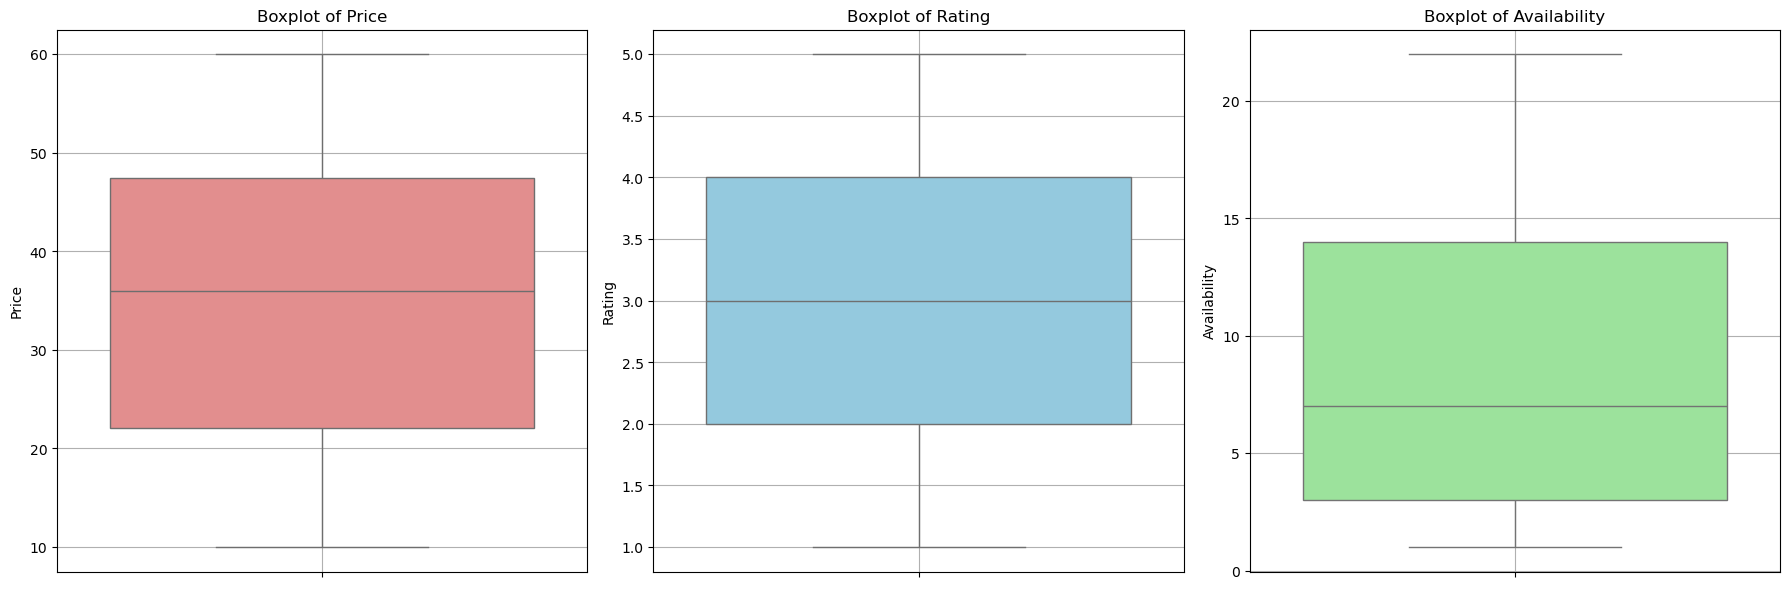

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Price Boxplot
sns.boxplot(y=df['Price'], color="lightcoral", ax=axes[0])
axes[0].set_title("Boxplot of Price")
axes[0].grid(True)

# Rating Boxplot
sns.boxplot(y=df['Rating'], color="skyblue", ax=axes[1])
axes[1].set_title("Boxplot of Rating")
axes[1].grid(True)

#  Availability Boxplot
sns.boxplot(y=df['Availability'], color="lightgreen", ax=axes[2])
axes[2].set_title("Boxplot of Availability")
axes[2].grid(True)

plt.tight_layout()
plt.show()



### **Handling Wrong or Inconsistent Data:**

In [89]:
# Remove rows with malformed price (already handled during conversion)
df = df[df['Price'] <= 100]  # Assuming anything above 100 is a likely error

# Validate rating range
df = df[df['Rating'].between(1, 5)]

# Remove placeholder or junk titles
df = df[~df['Title'].str.lower().str.contains('^placeholder|test|dummy')]

In [90]:
df

,UPC,Title,Price,Rating,Availability,Category
0,a897fe39b1053632,A Light in the Attic,51.77,3.0,22,Poetry
1,90fa61229261140a,Tipping the Velvet,53.74,1.0,20,Historical Fiction
2,6957f44c3847a760,Soumission,50.10,1.0,20,Fiction
3,e00eb4fd7b871a48,Sharp Objects,47.82,4.0,20,Mystery
4,4165285e1663650f,Sapiens: A Brief History of Humankind,54.23,5.0,20,History
...,...,...,...,...,...,...
995,cd2a2a70dd5d176d,Alice in Wonderland (Alice's Adventures in Won...,55.53,1.0,1,Classics
996,bfd5e1701c862ac3,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,4.0,1,Sequential Art
997,19fec36a1dfb4c16,A Spy's Devotion (The Regency Spies of London #1),16.97,5.0,1,Historical Fiction
998,f684a82adc49f011,1st to Die (Women's Murder Club #1),53.98,1.0,1,Mystery


### **Text Standardization:**

In [91]:
# Strip whitespaces
df['Title'] = df['Title'].str.strip()
df['Category'] = df['Category'].str.strip()

# Standardize casing
df['Title'] = df['Title'].str.title()
df['Category'] = df['Category'].str.title()

# Replace double spaces or weird symbols
df['Title'] = df['Title'].str.replace(r'\s{2,}', ' ', regex=True)
df['Title'] = df['Title'].str.replace(r'[^\w\s\-]', '', regex=True)

### **Encoding and Character Cleanup:**

In [92]:
# Remove non-ASCII characters and HTML tags
df['Title'] = df['Title'].str.encode('ascii', errors='ignore').str.decode('utf-8')
df['Title'] = df['Title'].str.replace(r'<.*?>', '', regex=True)

# Clean up known artifacts
df['Title'] = df['Title'].str.replace(r'\\xa0|\\u2013', '', regex=True)

In [93]:
df.shape

(996, 6)

### **Regex Expressions:**

In [94]:
# a. Price Extraction
price_text = "£53.74"
price = float(re.search(r"£(\d+\.\d+)", price_text).group(1))  # Extracts float value
print("Price:", price)

Price: 53.74


In [95]:
# b. Availability Count
availability_text = "In stock (22 available)"
availability = int(re.search(r"\((\d+)\savailable\)", availability_text).group(1))
print("Availability Count:", availability)

Availability Count: 22


In [96]:
# c. Star Rating Conversion
rating_text = 'class="star-rating Three"'
rating_word = re.search(r"star-rating\s(\w+)", rating_text).group(1)
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
rating = rating_map.get(rating_word, 0)
print("Star Rating:", rating)

Star Rating: 3


In [97]:
# d. Extract Category from Breadcrumb
breadcrumb = "/books/mystery_3/index.html"
category = re.search(r"/books/([a-zA-Z0-9-_]+)_\d+/", breadcrumb).group(1)
print("Category:", category)

Category: mystery


In [98]:
# e. Remove HTML Tags
html_text = "<p>This is a <b>great</b> book!</p>"
clean_text = re.sub(r"<[^>]+>", "", html_text)
print("Cleaned HTML:", clean_text)

Cleaned HTML: This is a great book!


In [99]:
# f. Extract Numbers from Mixed Text
mixed_text = "Only 12 left in stock!"
numbers = re.findall(r"\d+", mixed_text)
print("Numbers:", numbers)

Numbers: ['12']


In [100]:
# g. Remove Special Characters from Titles
title = 'Best Book: "The £ecret #Life* of! Bees?"'
clean_title = re.sub(r"[^a-zA-Z0-9\s\.,'-]", "", title)
print("Clean Title:", clean_title)

Clean Title: Best Book The ecret Life of Bees


In [101]:
# h. Validate ISBN or Product Code
isbn = "978-3-16-148410-0"
is_valid_isbn = bool(re.match(r"\d{3}-\d{1,5}-\d{1,7}-\d{1,7}-\d{1}", isbn))
print("Valid ISBN:", is_valid_isbn)

Valid ISBN: True


In [102]:
# i. Normalize Whitespace
messy_text = "This    book   is   amazing."
normalized_text = re.sub(r"\s+", " ", messy_text)
print("Normalized Text:", normalized_text)

Normalized Text: This book is amazing.


In [103]:
# j. Extract Book Title Keywords
book_title = "The Mystery of the Blue Train"
keywords = re.findall(r"\b[A-Z][a-z]+\b", book_title)
print("Keywords:", keywords)

Keywords: ['The', 'Mystery', 'Blue', 'Train']


In [104]:
# k. Extract Year from Description
description = "First published in 2016 by XYZ."
year = re.search(r"\b(19|20)\d{2}\b", description)
print("Year:", year.group(0) if year else "Not found")


Year: 2016


In [105]:
# l. Detect Uppercase Acronyms in Title
acronym_text = "Traveling Through the USA on Foot"
acronyms = re.findall(r"\b[A-Z]{2,}\b", acronym_text)
print("Acronyms:", acronyms)

Acronyms: ['USA']


In [106]:
# m. Extract Decimal Numbers from Mixed Text
decimal_text = "This item costs around 23.99 dollars."
decimal_number = re.search(r"\d+\.\d+", decimal_text).group(0)
print("Decimal Number:", decimal_number)

Decimal Number: 23.99


In [107]:
# n. Remove Bracketed Text
bracketed_text = "Harry Potter [Hardcover Edition]"
clean_brackets = re.sub(r"\[.*?\]|\(.*?\)", "", bracketed_text).strip()
print("Without Brackets:", clean_brackets)

Without Brackets: Harry Potter


In [108]:
# o. Extract URL Slugs
slug_url = "/book/the-great-gatsby_45/index.html"
slug = re.search(r"/book/([a-z0-9-]+)_", slug_url).group(1)
print("URL Slug:", slug)

URL Slug: the-great-gatsby


In [109]:
# p. Extract Currency Symbols
currency_text = "$49.99 or €45.00"
currencies = re.findall(r"[£$€]", currency_text)
print("Currency Symbols:", currencies)

Currency Symbols: ['$', '€']


In [110]:
# q. Find Books with Ellipses
ellipsis_title = "The Lord of the..."
is_truncated = bool(re.search(r"\.\.\.$", ellipsis_title))
print("Title Truncated:", is_truncated)

Title Truncated: True


In [111]:
# r. Strip Extra Punctuation
exclamation_text = "Wow!!! What a book!!!"
clean_exclamation = re.sub(r"[!?.]{2,}", lambda m: m.group(0)[0], exclamation_text)
print("Cleaned Punctuation:", clean_exclamation)

Cleaned Punctuation: Wow! What a book!


In [112]:
# s. Detect Email or Contact Info
contact_text = "Contact us at support@example.com"
emails = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-z]{2,}", contact_text)
print("Emails:", emails)

Emails: ['support@example.com']


In [113]:
# t. Parse Ratings as Words with Optional Tags
rating_text_2 = "Rated: Four stars"
rating_phrase = re.search(r"(?:One|Two|Three|Four|Five)[\s-]*stars?", rating_text_2)
print("Rating Phrase:", rating_phrase.group(0) if rating_phrase else "Not found")

Rating Phrase: Four stars


# **Data Analysis:**

### **Descriptive statistics**

####  *a) Numerical features: analyzing price , rating & Availability*

In [114]:
# analyze the price
mean_Price = df['Price'].mean()  # Calculate the mean
median_Price = df['Price'].median()  # Calculate the median
mode_Price = df['Price'].mode()  # Calculate the mode
std_price= df['Price'].std()
print("Statistics for Price:")
print(f" Range: {df['Price'].max()-df['Price'].min()}")
print(f"  Mean: {mean_Price}")
print(f"  Median: {median_Price}")
print(f"  Mode: {list(mode_Price)}")  # Convert mode Series to a list for clarity
print(f"The average price of eBooks is ${mean_Price:.2f}, with a standard deviation of ${std_price:.2f}.")

Statistics for Price:
 Range: 49.99
  Mean: 35.056586345381525
  Median: 35.94
  Mode: [16.28, 27.88, 37.34, 39.24, 44.18]
The average price of eBooks is $35.06, with a standard deviation of $14.46.


In [115]:
# analyze the rating
mean_Rating = df['Rating'].mean()  # Calculate the mean
median_Rating = df['Rating'].median()  # Calculate the median
mode_Rating = df['Rating'].mode()  # Calculate the mode (returns a Series)
print("Statistics for Rating:")
print(f"  Range: {df['Rating'].max()-df['Rating'].min()}")
print(f"  Mean: {mean_Rating}")
print(f"  Median: {median_Rating}")
print(f"  Mode: {mode_Rating}")
print(f"The mean rating across books is {mean_Rating:.2f}, with values ranging from 1 to 5.")

Statistics for Rating:
  Range: 4.0
  Mean: 2.924698795180723
  Median: 3.0
  Mode: 0    1.0
Name: Rating, dtype: float64
The mean rating across books is 2.92, with values ranging from 1 to 5.


In [116]:
# analyze the Availability
mean_Availability = df['Availability'].mean()  # Calculate the mean
median_Availability= df['Availability'].median()  # Calculate the median
mode_Availability = df['Availability'].mode()  # Calculate the mode (returns a Series)
print(f"Statistics for Availability:")
print(f"  Range: {df['Availability'].max()-df['Availability'].min()}")
print(f"  Mean: {mean_Availability}")
print(f"  Median: {median_Availability}")
print(f"  Mode: {mode_Availability}")
print(f"The mean Availability across books is {mean_Availability:.2f}")


Statistics for Availability:
  Range: 21
  Mean: 8.57128514056225
  Median: 7.0
  Mode: 0    3
Name: Availability, dtype: int32
The mean Availability across books is 8.57


#### *b) Categorical features : Identify the most common Category and its percentage*

In [117]:
Category_counts = df['Category'].value_counts()  # Count occurrences of each Category
Category_counts

Category
Default               151
Nonfiction            109
Sequential Art         75
Add A Comment          67
Fiction                64
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food And Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Spirituality            6
Christian Fiction       6
New Adult               6
Religion                6
Sports And Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Con

In [118]:
most_common_Category = Category_counts.idxmax()  # Get the most common Category
most_common_Category_count = Category_counts.max()  # Get the count of the most common Category
total_Categories = len(df)  # Total number of rows in the dataset
percentage_most_common = (most_common_Category_count / total_Categories) * 100  # Calculate percentage

print(f"The most common Category is '{most_common_Category}' representing {percentage_most_common:.2f}% of the dataset.")

The most common Category is 'Default' representing 15.16% of the dataset.


In [119]:
# Summary table for numerical features
df.describe()

,Price,Rating,Availability
count,996.000000,996.000000,996.000000
mean,35.056586,2.924699,8.571285
std,14.462543,1.436548,5.652050
min,10.000000,1.000000,1.000000
25%,22.095000,2.000000,3.000000
50%,35.940000,3.000000,7.000000
75%,47.457500,4.000000,14.000000
max,59.990000,5.000000,22.000000


In [120]:
# Correlation Analysis
correlation_matrix = df[['Price', 'Rating']].corr()
correlation_matrix


,Price,Rating
Price,1.000000,0.027128
Rating,0.027128,1.000000


#### We notice that price_rating_corr > 0; therefore A weak positive correlation was observed between Price and Rating.
#### Higher-priced books tend to receive better ratings.

###  **Trend identification**

In [121]:
# a. Price Trends: Average price by category
avg_price_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)

print("\nPrice Trends:")
print("- Certain categories tend to have higher average prices:")
for category, avg_price in avg_price_category.head(5).items():  # Top 5 categories with the highest average prices
    print(f"  - {category}: ${avg_price:.2f}")



Price Trends:
- Certain categories tend to have higher average prices:
  - Suspense: $58.33
  - Novels: $54.81
  - Politics: $53.61
  - Health: $51.45
  - New Adult: $46.38


In [122]:
# b. Average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("\nRating Trends:")
print("- Certain categories tend to have higher average ratings:")
for category, avg_rating in avg_rating_by_category.head(5).items():  # Top 5 categories with the highest average ratings
    print(f"  - {category}: {avg_rating:.2f}")



Rating Trends:
- Certain categories tend to have higher average ratings:
  - Erotica: 5.00
  - Adult Fiction: 5.00
  - Novels: 5.00
  - Christian Fiction: 4.17
  - Health: 3.75


### ***Patterns Recognition and Relationship Analysis***

In [123]:
# Correlation Analysis
correlation_matrix = df[['Price', 'Availability']].corr()
correlation_matrix

,Price,Availability
Price,1.000000,-0.012993
Availability,-0.012993,1.000000


#### We notice that price_availability_corr < 0 ; therefore A weak negative correlation was observed between price & availability.
#### No linear relationship between price & availability.

### **Clustering Analysis**

In [124]:
#import important libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [125]:
# Select features for clustering " we will cluster by Price and Rating"
features = df[['Price', 'Rating']]
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
#see scaled features
X_scaled

array([[ 1.15621508,  0.05244449],
       [ 1.29249745, -1.34048111],
       [ 1.04068636, -1.34048111],
       ...,
       [-1.25120961,  1.44537008],
       [ 1.30910038, -1.34048111],
       [-0.6209901 ,  1.44537008]])

In [126]:
#Apply Clustring
kmeans = KMeans(n_clusters=3, random_state=42)  # Use 3 clusters


In [127]:
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.sample(10)

,UPC,Title,Price,Rating,Availability,Category,Cluster
486,77e9ea355bd8ae57,Brazen The Courage To Find The You ThatS Been ...,19.22,2.0,8,Nonfiction,1
730,b9f6305a3d650e2c,The Picture Of Dorian Gray,29.70,2.0,3,Classics,2
135,37c0cb19713d8dda,The White Cat And The Monk A Retelling Of The ...,58.08,4.0,15,Childrens,0
561,2a1b3d967cda1da2,Tell The Wolves IM Home,50.96,2.0,6,Young Adult,2
570,012170e4fc87ace0,Give It Back,18.32,2.0,6,Thriller,1
360,14e44163678e24dc,The Midnight Watch A Novel Of The Titanic And ...,26.20,1.0,12,Add A Comment,2
207,7edc0527cf782e19,Batman The Long Halloween Batman,36.50,2.0,15,Sequential Art,2
479,8a150fd8ff5d7686,History Of Beauty,10.29,4.0,8,Art,1
359,ce1ae197ada2aec4,The Silent Sister Riley Macpherson 1,46.29,5.0,12,Fiction,0
441,d6d9ffea95f2f8bf,Art And Fear Observations On The Perils And Re...,48.63,4.0,9,Art,0


In [128]:
# Number of Books in each  Cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# تحويلها لـ DataFrame
cluster_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Book Count': cluster_counts.values
})

cluster_summary


,Cluster,Book Count
0,0,307
1,1,309
2,2,380


In [129]:
# reverse Standardization
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
#get cluster_centers
cluster_centers = pd.DataFrame(original_centers, columns=['Price', 'Rating'])
print("Cluster Centers (Price, Rating)  :")
cluster_centers



Cluster Centers (Price, Rating)  :


,Price,Rating
0,47.459773,4.061688
1,20.671942,3.656958
2,36.704802,1.403694


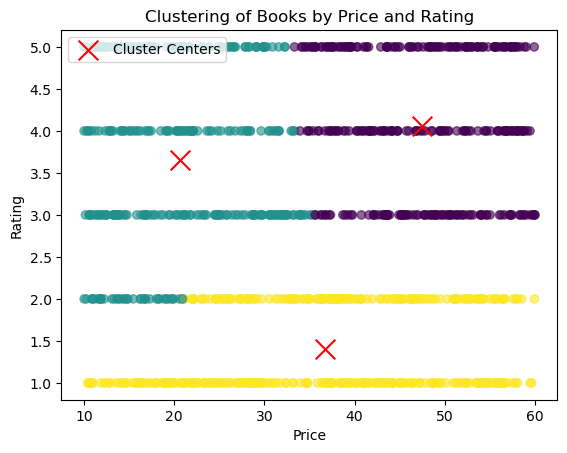

In [130]:
# Visualize the clusters
plt.scatter(features['Price'], features['Rating'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(cluster_centers['Price'], cluster_centers['Rating'], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Clustering of Books by Price and Rating')
plt.legend()
plt.show()

# **Data Visualization:**

In [131]:
df = df.drop('Cluster', axis=1)

## **Show the distribution of Book Prices:**

Text(0, 0.5, 'Count')

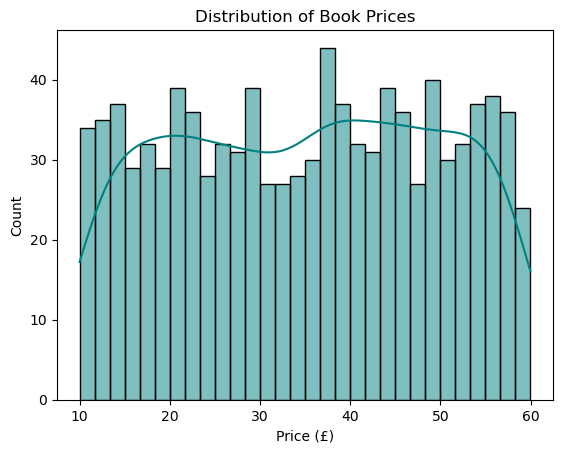

In [132]:
# Visualization 1: Price Distribution using Histogram
sns.histplot(df['Price'], bins=30, kde=True, color='teal')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')

### **Show how many books have each rating (1-5):**

Rating
1.0    226
3.0    203
5.0    196
2.0    193
4.0    178
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\1044676053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


Text(0, 0.5, 'Count')

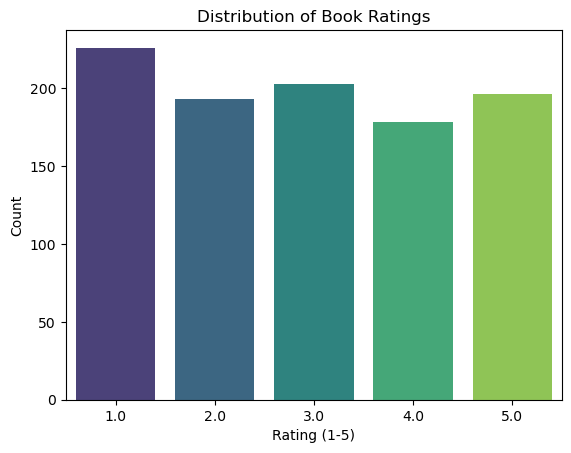

In [133]:
# Visualization 2: Rating Distribution using Count Plot
rating_counts = df['Rating'].value_counts()
print(rating_counts)
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Count')

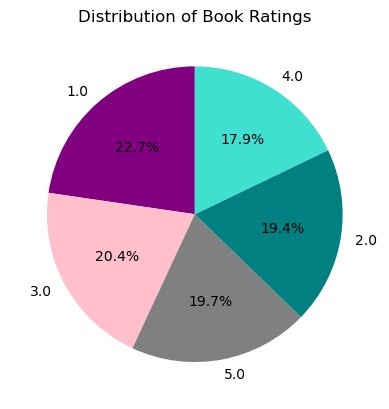

In [155]:
# Rating distribution using Pie Chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['purple','pink','gray','teal','turquoise'])
plt.title('Distribution of Book Ratings')
plt.show()

## **Compare Price distribution across different Rating:**

C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\4274738170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price', data=df, palette='Set1')


Text(0, 0.5, 'Price (£)')

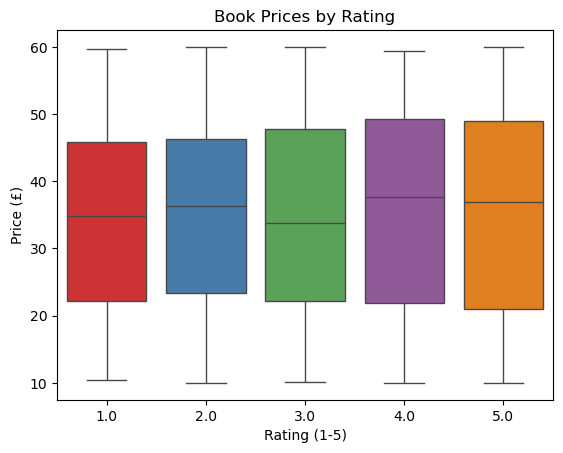

In [134]:
# Visualization 3: Price vs Rating using Boxplot
sns.boxplot(x='Rating', y='Price', data=df, palette='Set1')
plt.title('Book Prices by Rating')
plt.xlabel('Rating (1-5)')
plt.ylabel('Price (£)')

## **Rank Categories by their average Book Price:**

Category
Suspense            58.330000
Novels              54.810000
Politics            53.613333
Health              51.452500
New Adult           46.383333
Christian           42.496667
Sports And Games    41.166000
Self Help           40.620000
Travel              39.794545
Fantasy             39.593958
Name: Price, dtype: float64


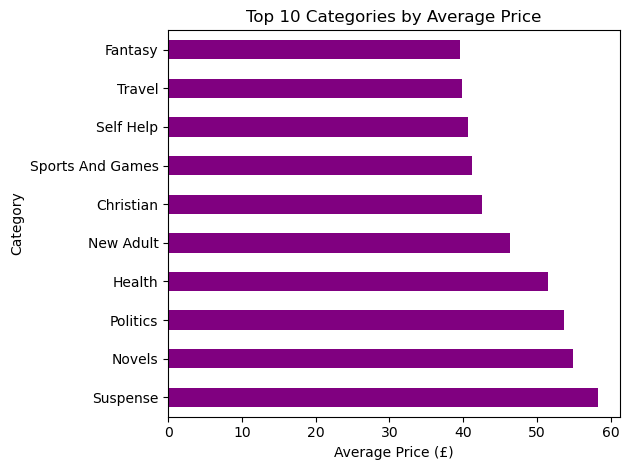

In [135]:
# Visualization 4: Top Categories by Average Price using Horizontal Barchart
top_categories = df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)
print(top_categories)
top_categories.plot(kind='barh', color='purple')
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Average Price (£)')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

## **Rank Categories by their Book Count:**


Category
Default               151
Nonfiction            109
Sequential Art         75
Add A Comment          67
Fiction                64
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food And Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\924453759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories_count.index, x=top_categories_count.values, palette='rocket')


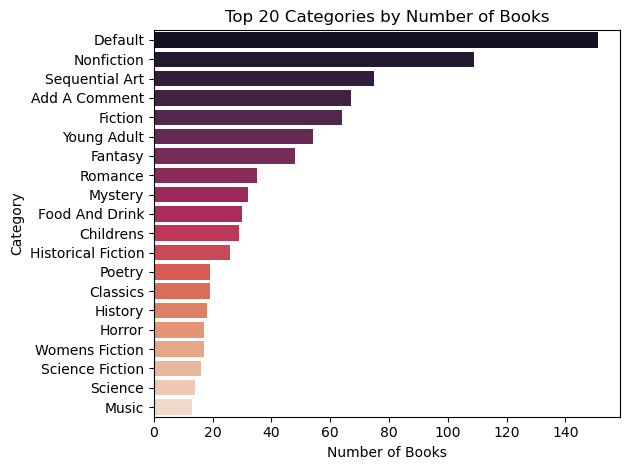

In [136]:
# Visualization 5: Top 20 Categories by Book Count using Horizontal Barchart
top_categories_count = df['Category'].value_counts().head(20)
print(top_categories_count)
sns.barplot(y=top_categories_count.index, x=top_categories_count.values, palette='rocket')
plt.title('Top 20 Categories by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

## **Examine relationship between Price & Rating for Top Categories:**

In [137]:
categories_sample = df['Category'].value_counts().head(5).index
print(categories_sample)
sample_df = df[df['Category'].isin(categories_sample)]
sample_df.head()

Index(['Default', 'Nonfiction', 'Sequential Art', 'Add A Comment', 'Fiction'], dtype='object', name='Category')


,UPC,Title,Price,Rating,Availability,Category
2,6957f44c3847a760,Soumission,50.10,1.0,20,Fiction
7,e72a5dfc7e9267b2,The Coming Woman A Novel Based On The Life Of ...,17.93,3.0,19,Default
8,e10e1e165dc8be4a,The Boys In The Boat Nine Americans And Their ...,22.60,4.0,19,Default
10,0312262ecafa5a40,Starving Hearts Triangular Trade Trilogy 1,13.99,2.0,19,Default
13,3b1c02bac2a429e6,Scott PilgrimS Precious Little Life Scott Pilg...,52.29,5.0,19,Sequential Art


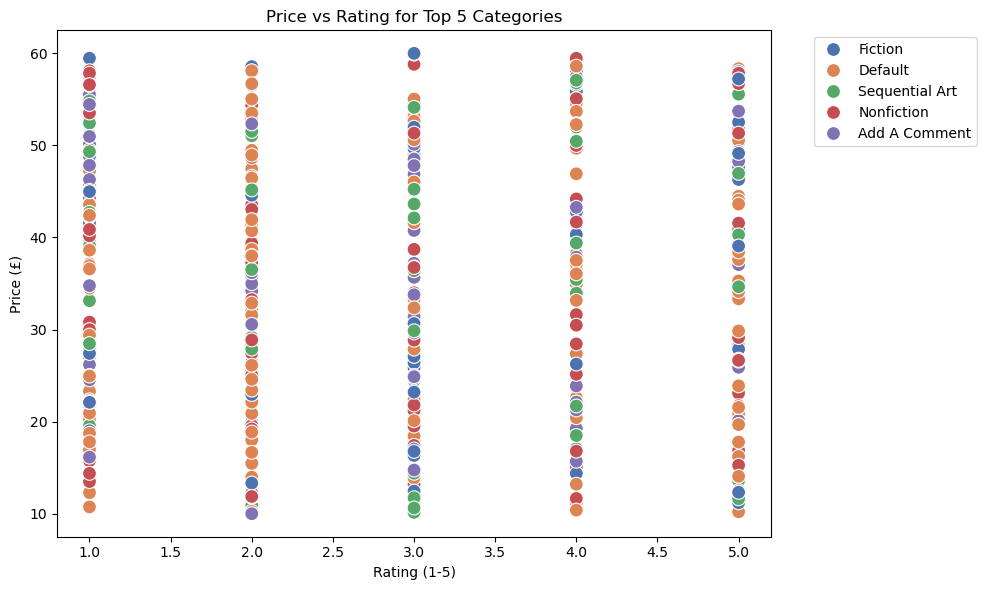

In [138]:
# Visualization 6: Price vs Rating with Category Hue using Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', hue='Category', data=sample_df, palette='deep', s=100)
plt.title('Price vs Rating for Top 5 Categories')
plt.xlabel('Rating (1-5)')
plt.ylabel('Price (£)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Show where most Books are priced in each Category:**

C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\490391940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Price', data=df[df['Category'].isin(top_10_categories)],


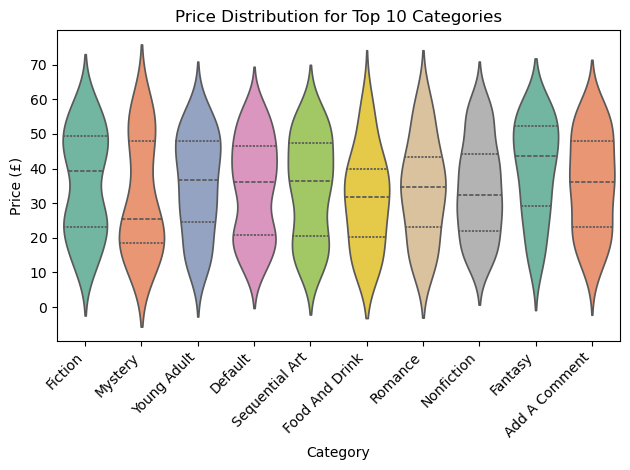

In [139]:
# Visualization 7: Price Distribution by Category using Violin Plot
top_10_categories = df['Category'].value_counts().head(10).index
sns.violinplot(x='Category', y='Price', data=df[df['Category'].isin(top_10_categories)],
               palette='Set2', inner='quartile')
plt.title('Price Distribution for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Display most frequent words in Book Titles:**

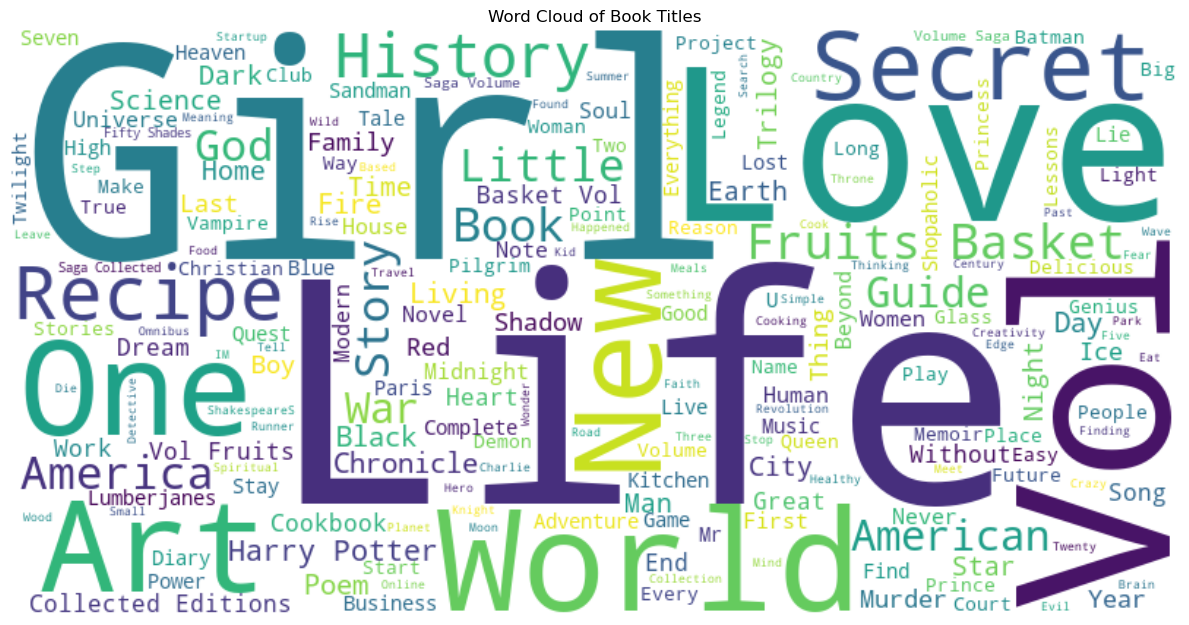

In [140]:
# Visualization 8: Book Titles using Word Cloud
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.tight_layout()
plt.show()

## **Check if Price & Rating are correlated:**

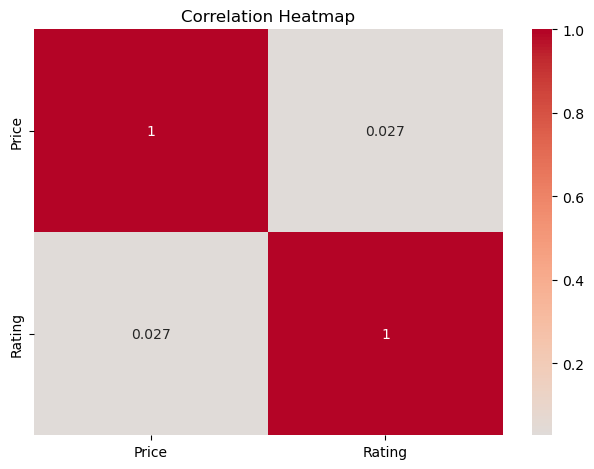

In [141]:
# Visualization 9: Price & Rating Correlation using Heatmap
correlation_matrix = df[['Price', 'Rating']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## **Show what percentage of Books fall under a certain Price:**

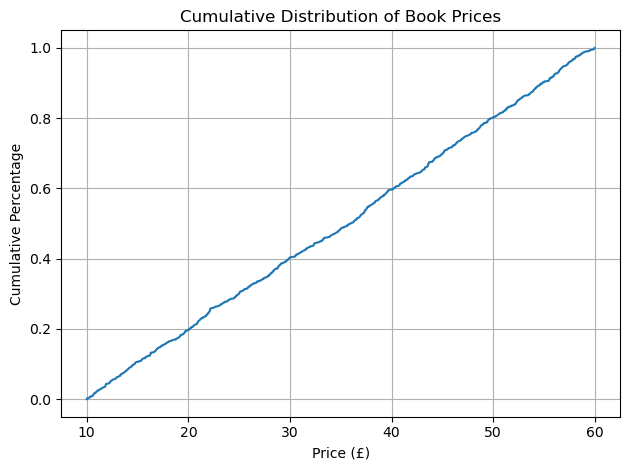

In [142]:
# Visualization 10: Price Distribution using Line Plot (Cumulative Distribution)
sorted_prices = np.sort(df['Price'])
yvals = np.arange(len(sorted_prices))/float(len(sorted_prices)-1)
plt.plot(sorted_prices, yvals)
plt.title('Cumulative Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Sow Distribution of Book Availability:**

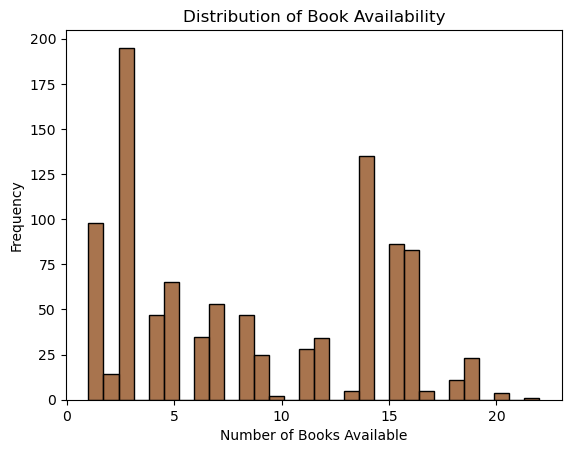

In [143]:
# Visualization 11: Book Availability Distribution using Histogram
sns.histplot(df['Availability'], bins=30, color='#8B4513')
plt.title('Distribution of Book Availability')
plt.xlabel('Number of Books Available')
plt.ylabel('Frequency')
plt.show()

## **Show Availability Distribution within Categories:**

In [144]:
# Define availability ranges and labels
availability_ranges = [0, 10, 20, 30, 40, float('inf')]
availability_labels = ['0-10', '11-20', '21-30', '31-40', '41+']

# Create a new column 'Availability Range' based on the ranges
df['Availability Range'] = pd.cut(df['Availability'], bins=availability_ranges, labels=availability_labels)

# Group by category and availability range, then count occurrences
category_availability = df.groupby(['Category', 'Availability Range'])['Title'].count().reset_index()

# Pivot the table for stacked bar chart
category_availability = category_availability.pivot(index='Category', columns='Availability Range', values='Title')

# Select top categories to avoid overcrowding
top_categories = category_availability.sum(axis=1).sort_values(ascending=False).head(20).index
category_availability = category_availability.loc[top_categories]

category_availability

C:\Users\DELL\AppData\Local\Temp\ipykernel_10052\2275781150.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_availability = df.groupby(['Category', 'Availability Range'])['Title'].count().reset_index()


Availability Range,0-10,11-20,21-30,31-40,41+
Category,,,,,
Default,89,62,0,0,0
Nonfiction,62,47,0,0,0
Sequential Art,37,38,0,0,0
Add A Comment,44,23,0,0,0
Fiction,33,31,0,0,0
Young Adult,32,22,0,0,0
Fantasy,30,18,0,0,0
Romance,20,15,0,0,0
Mystery,15,17,0,0,0


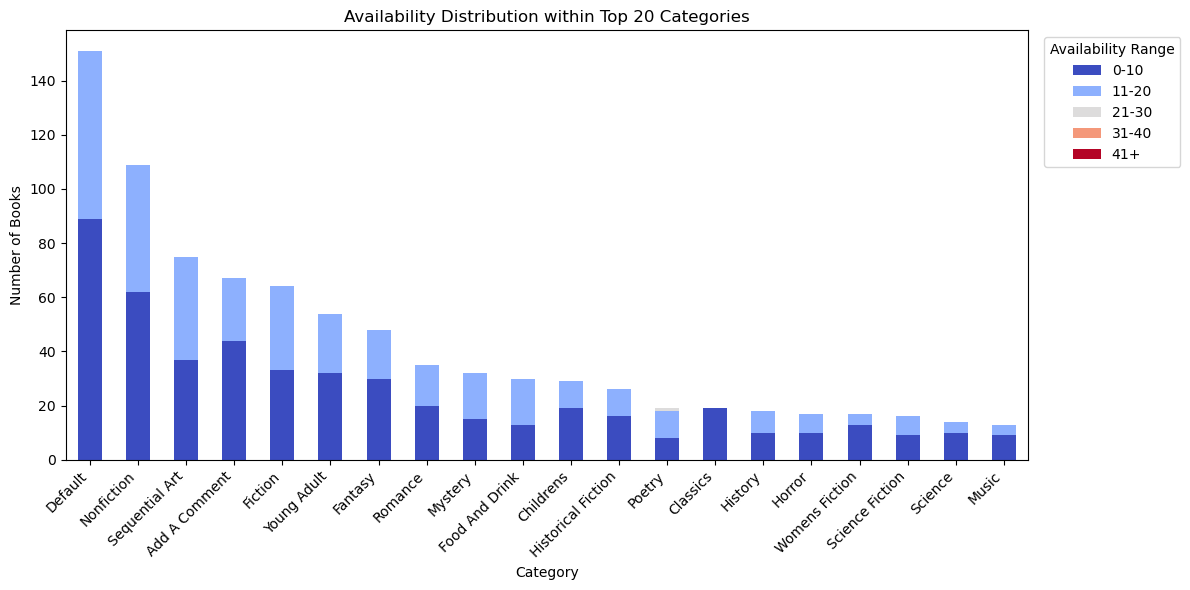

In [145]:
# Visualization 12: Availability Distribution by Categories using Stacked Bar Chart

category_availability.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Availability Distribution within Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Availability Range', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Data Storage:**

In [147]:
client = MongoClient('mongodb://localhost:27017/')
db = client['Database']
collection = db['Books']
collection.create_index('UPC', unique=True)

data = df.to_dict(orient="records")

if data:
    for record in data:
        upc_value = record['UPC']
        collection.update_one(
            {'UPC': upc_value},      # Search condition for the record
            {'$set': record},           # Fields to update or insert
            upsert=True                # # Insert if not found, otherwise update
        )
    print("Data was successfully inserted or updated in MongoDB.")
else:
    print("No data to insert.")


Data was successfully inserted or updated in MongoDB.
